In [3]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [4]:
wine = load_wine()

In [5]:
import pandas as pd
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [63]:
X_train,X_test,Y_train,Y_test = train_test_split(wine.data,wine.target,test_size = 0.23)

In [7]:
X_train.shape

(124, 13)

In [62]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)
score = clf.score(X_test,Y_test)
score

0.8518518518518519

In [39]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [40]:
y_pred=clf.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = (confusion_matrix(Y_test,y_pred))
cmdf = pd.DataFrame(cm,index=wine.target_names,
                    columns=wine.target_names)
cmdf

,class_0,class_1,class_2
class_0,11,5,0
class_1,0,23,1
class_2,2,0,12


In [41]:
import graphviz

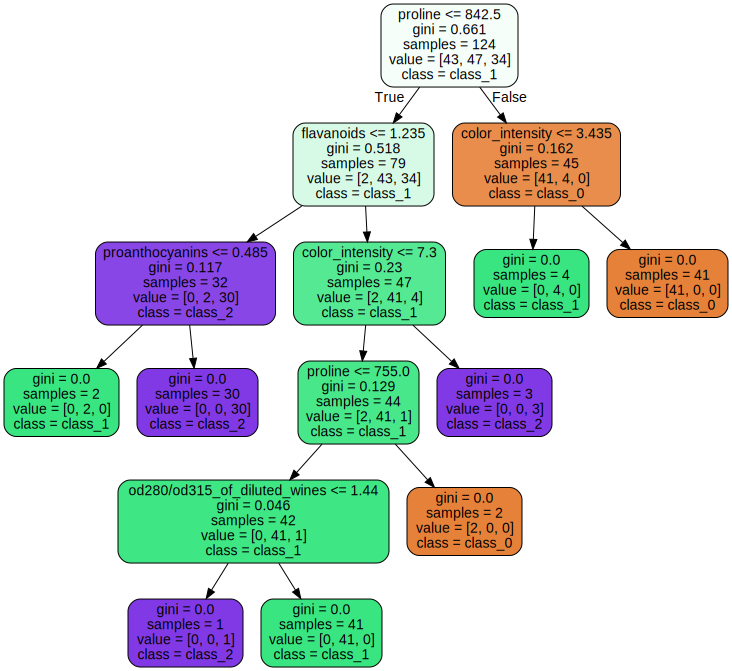

In [12]:
dot_data = tree.export_graphviz(clf,
                                feature_names = wine.feature_names,
                                class_names = wine.target_names,
                                filled = True,
                                rounded = True)
graph = graphviz.Source(dot_data)
graph

In [17]:
[*zip(wine.feature_names,clf.feature_importances_)]

[('alcohol', 0.0),
 ('malic_acid', 0.0),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.0),
 ('total_phenols', 0.0),
 ('flavanoids', 0.32156635889381135),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0457587089155678),
 ('color_intensity', 0.15149892608007318),
 ('hue', 0.0),
 ('od280/od315_of_diluted_wines', 0.023823581784613062),
 ('proline', 0.4573524243259347)]

In [88]:
clf = tree.DecisionTreeClassifier(#criterion = "entropy"
                                   random_state = 0
                                   ,splitter="random"
                                 #  ,max_depth=4
                                 )
    
clf = clf.fit(X_train,Y_train)
score = clf.score(X_test,Y_test)
score

0.9512195121951219

In [69]:
score = clf.score(X_train,Y_train)
score

1.0

In [102]:

i = 1
while i <100:
    clf = tree.DecisionTreeClassifier(criterion = "entropy"
                                   ,random_state = i
                                   ,splitter="random"
                                  ,max_depth= 3 
                                 )
    
    clf = clf.fit(X_train,Y_train)
    score = clf.score(X_test,Y_test)
    print(i)
    print(score)
    i+=1

1
0.8292682926829268
2
0.7560975609756098
3
0.9024390243902439
4
0.8292682926829268
5
0.7560975609756098
6
0.8536585365853658
7
0.7804878048780488
8
0.8780487804878049
9
0.8536585365853658
10
0.8048780487804879
11
0.9024390243902439
12
0.7804878048780488
13
0.7317073170731707
14
0.7317073170731707
15
0.7560975609756098
16
0.8780487804878049
17
0.7560975609756098
18
0.7317073170731707
19
0.7804878048780488
20
0.7560975609756098
21
0.6585365853658537
22
0.7073170731707317
23
0.8536585365853658
24
0.9024390243902439
25
0.7073170731707317
26
0.926829268292683
27
0.8292682926829268
28
0.7560975609756098
29
0.7804878048780488
30
0.8292682926829268
31
0.926829268292683
32
0.7804878048780488
33
0.7804878048780488
34
0.8536585365853658
35
0.9024390243902439
36
0.9512195121951219
37
0.7804878048780488
38
0.8536585365853658
39
0.8536585365853658
40
0.8292682926829268
41
0.8536585365853658
42
0.7560975609756098
43
0.8048780487804879
44
0.8048780487804879
45
0.6097560975609756
46
0.8536585365853658